OR 게이트 구현해보기 0,0-> 0  1,0 -> 1  1,1 -> 1

데이터 준비하기

In [ ]:
import numpy as np

import tensorflow as tf
tf.random.set_seed(777)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import mse


In [ ]:
# 데이터 준비하기
data = np.array([[0,0],[1,0],[0,1],[1,1]]) # OR 연산 학습 데이터
# label = np.array([[0],[1],[1],[1]]) # 정답 OR 연산
label = np.array([[0],[1],[1],[0]]) # 정답 XOR 연산

모델 구성하기

In [ ]:
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='linear')) # 단층 퍼셉트론 구성
# 입력값 2개, 활성화 함수 linear

모델 설정하기

In [ ]:
model.compile(optimizer=SGD(), loss=mse, metrics=['acc']) # 가중치 학습할 때 업데이트 시켜주는 함수
                                # loss 몇개 맞췄는지 틀렸는지 손실함수

In [ ]:
# 모델 확인하기
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


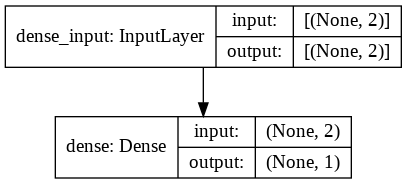

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True,rankdir='TB', expand_nested=False, dpi=96)


모델 학습시키기

In [ ]:
history = model.fit(data, label, epochs=100) # 학습데이터, 정답, 공부 횟수

학습결과 그려보기

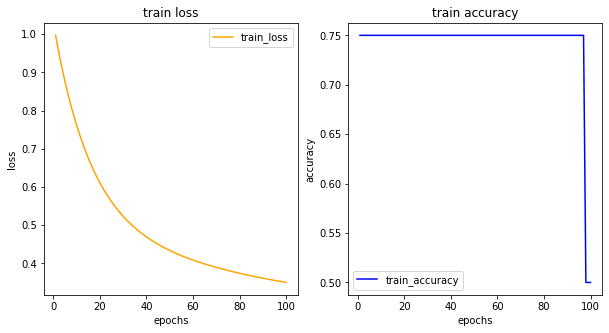

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'orange', label = 'train_loss')
ax1.set_title('train loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_accuracy')
ax2.set_title('train accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()

모델 가중치 확인

In [ ]:
model.get_weights()

[array([[ 0.48035824],
        [-0.4017862 ]], dtype=float32), array([0.42530513], dtype=float32)]

모델 예측하기

In [ ]:
result = model.predict_classes(data)
print(result)

[[0]
 [1]
 [0]
 [1]]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
